In [2]:
import pandas as pd
data = pd.read_csv('Breast-cancer.csv')

print(data.shape)
data.head()

(569, 32)


,ID,diagnosis,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,...,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data = data.drop('ID',axis=1)
data.head()

,diagnosis,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = data.pop('diagnosis')
print(data.shape)
print(y.shape)

(569, 30)
(569,)


In [5]:
y = y.replace(['B','M'],[0,1])
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Dimensionality of the original dataset =", data.shape[1])
print("Dimensionality of the transformed dataset =", X_pca.shape[1])

Dimensionality of the original dataset = 30
Dimensionality of the transformed dataset = 2


In [8]:
print(pca.explained_variance_)

[13.30499079  5.7013746 ]


In [9]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


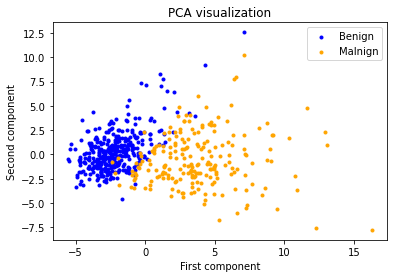

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(X_pca[y==0,0],X_pca[y==0,1],label='Benign',marker='.',color='blue')
ax.scatter(X_pca[y==1,0],X_pca[y==1,1],label='Malnign',marker='.',color='orange')
ax.set_xlabel("First component")
ax.set_ylabel("Second component")
ax.set_title("PCA visualization")
ax.legend()
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y,test_size=0.3)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,Y_train)
print("Testing accuracy on the original data ={}".format(tree_model.score(X_test,Y_test)))

Testing accuracy on the original data =0.9005847953216374


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(X_pca, y, stratify=y, test_size=0.3)

tree_model_PCA = DecisionTreeClassifier()
tree_model_PCA.fit(X_train_PCA,Y_train_PCA)
print("Testing accuracy on the transformed data ={}".format(tree_model_PCA.score(X_test_PCA,Y_test_PCA)))

Testing accuracy on the transformed data =0.9239766081871345
